In [1]:
import pandas as pd
from openpyxl import Workbook, load_workbook
from openpyxl.utils import get_column_letter
import matplotlib.pyplot as plt


ws = load_workbook('skilsmassa.xlsx').active

gifta = [ws[get_column_letter(col) + str(row)].value for col in range(3,25) for row in range (5,6)]
skilda = [ws[get_column_letter(col) + str(row)].value for col in range(25,47) for row in range (5,6)]
ar = list(range(2000,2022))

df = pd.DataFrame(list(zip(gifta,skilda)), columns =['Gifta', 'Skilda'], index=ar)

df

,Gifta,Skilda
2000,43138,22082
2001,39157,21527
2002,41523,21861
2003,42693,21818
2004,47053,20808
2005,48215,20747
2006,50501,21285
2007,53506,21812
2008,56445,22580
2009,53567,23534


<AxesSubplot: >

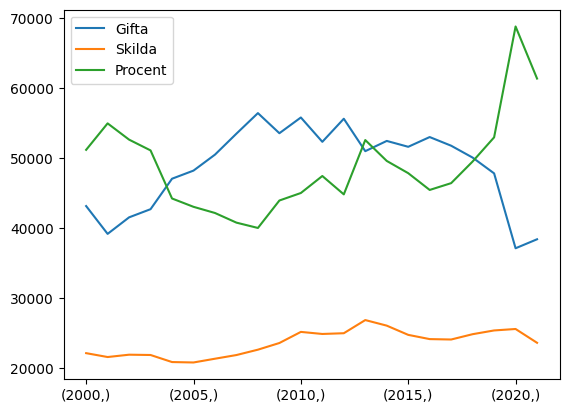

In [210]:
xl = 'skilsmassa.xlsx'
df = pd.read_excel(xl)

#Create data frames
tdf1, tdf2 = df.loc[3:3, 'Unnamed: 2':'Unnamed: 23'].copy(), df.loc[3:3, 'Unnamed: 24':'Unnamed: 45'].copy()

#add row index
tdf1.columns, tdf2.columns = [list(range(2000,2022))], [list(range(2000,2022))]
prcnt = [s/g*100000 for g, s in zip(stats[0],stats[1])]#

tdf1, tdf2 = tdf1.transpose(), tdf2.transpose()


ndf = pd.DataFrame()
ndf["Gifta"], ndf["Skilda"], ndf['Procent']= tdf1[3], tdf2[3], prcnt

#ndf

ndf.plot()


In [171]:


xl = 'skilsmassa.xlsx'

df = pd.read_excel(xl)

ndf = df.loc[3:3, 'Unnamed: 2':'Unnamed: 23'].copy()

ndf.columns=[list(range(2000,2022))]

#new_df = new_df.append(df.loc[3:3, 'Unnamed: 24':'Unnamed: 45'], ignore_index = False)

ndf = ndf.transpose()


ndf 

,3
2000,43138
2001,39157.0
2002,41523.0
2003,42693.0
2004,47053.0
2005,48215.0
2006,50501.0
2007,53506.0
2008,56445.0
2009,53567.0


<AxesSubplot: >

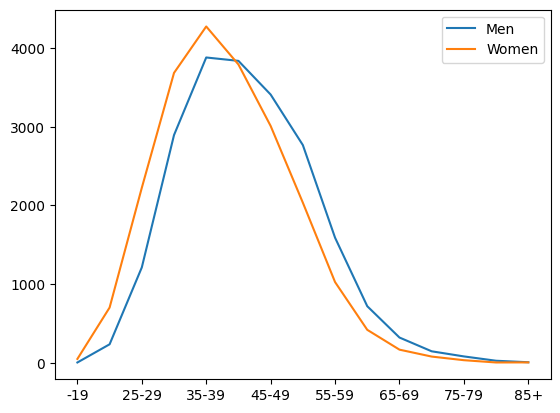

In [6]:

xl = 'generationer.xlsx'

df = pd.read_excel(xl)

df = df.loc[2:31, 'Unnamed: 3':'Unnamed: 5'].copy()
df = df.fillna('')

stats = df['Unnamed: 5'].tolist()
ages = [('{age}-{age2}'.format(age=n,age2=n+4)) for n in range(15,86,5)]
K, M = [stats[s] for s in range(1,len(stats),2)], [stats[s] for s in range(0,len(stats),2)]
skillnad = [k/m for k, m in zip(K,M)]#


ndf = pd.DataFrame(list(zip(M,K)), columns=['Men', 'Women'], index=ages)
ndf.rename(index = {"15-19": "-19", "85-89":"85+"}, inplace=True)

ndf.plot()

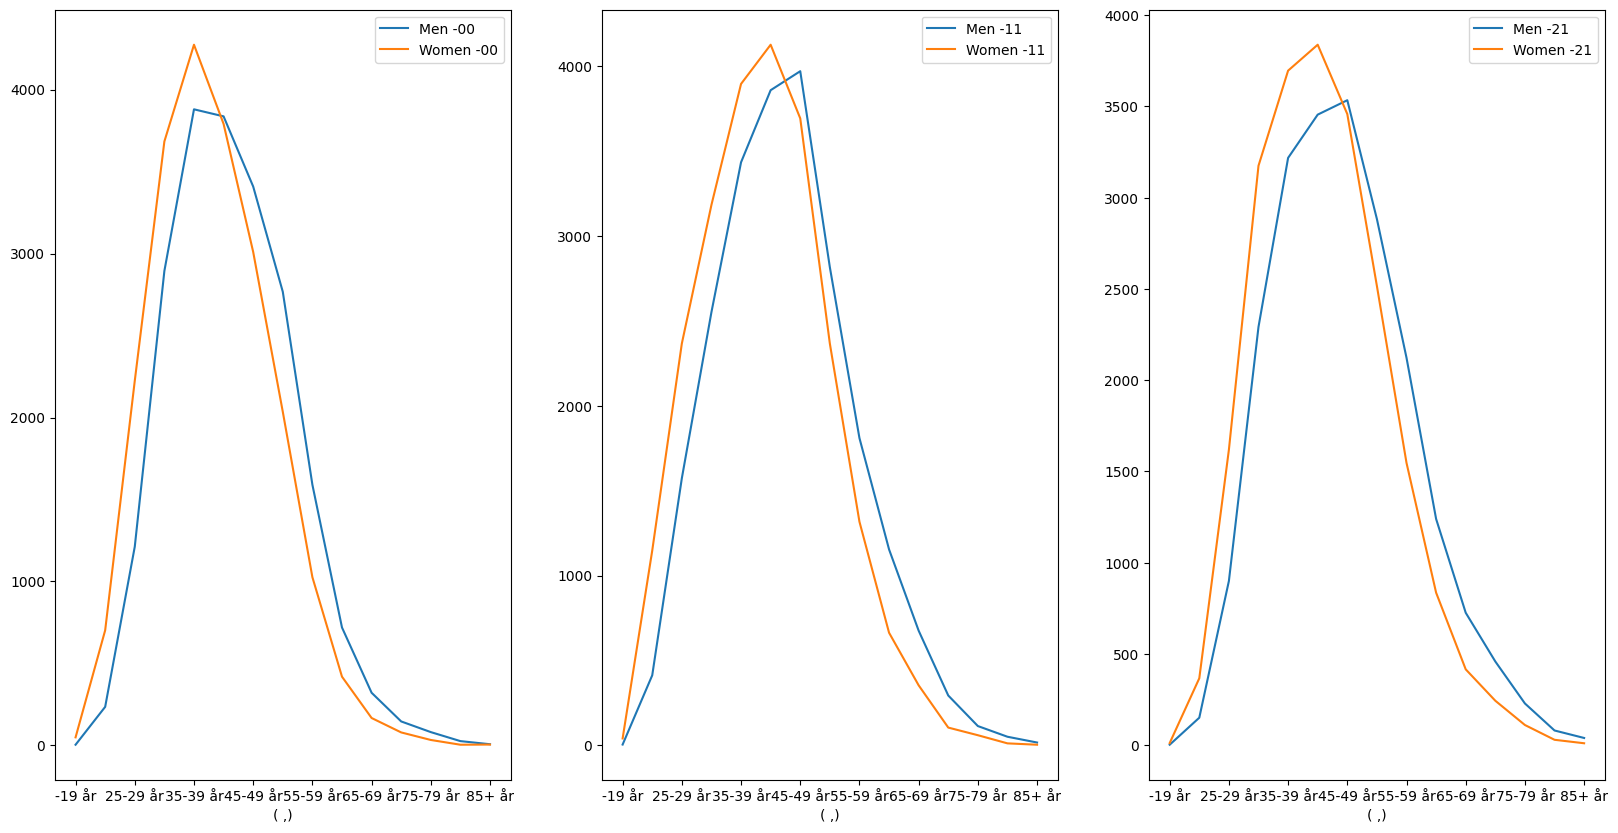

In [5]:

xl = 'generationer.xlsx'

#Extractar relevanta kolumner till en df

df = pd.read_excel(xl)
df = df.loc[1:31, 'Unnamed: 3':'Unnamed: 7'].copy()
df = df.fillna('')
df.columns = [list(' ' * 5)]
df.index = [list(' ' * 31)]


#Sorterar data efter år, i egna df

m00 = df.iloc[1::2, 2] #men 2000
w00 = df.iloc[2::2, 2,] #kvinnor 2000
m11 = df.iloc[1::2, 3,] #män 2011
w11 = df.iloc[2::2, 3,] #kvinnor 2011
m21 = df.iloc[1::2, 4,] #män 2021
w21 = df.iloc[2::2, 4,] #kvinnor 2021
ag = df.iloc[1::2, 0,] #kvinnor 2021


ndf00 = pd.DataFrame(list(zip(m00,w00)), columns=['Men -00', 'Women -00'], index=ag)
ndf11 = pd.DataFrame(list(zip(m11,w11)), columns=['Men -11', 'Women -11'], index=ag)
ndf21 = pd.DataFrame(list(zip(m21,w21)), columns=['Men -21', 'Women -21'], index=ag)



#ndf["Men-00"], ndf["Women-00"],ndf["Men-11"], ndf["Women-11"],ndf["Men-21"], ndf["Women-21"]= m00, w00,m11,w11,m21,w21 

#ndf.index = ag
fig, ax = plt.subplots(ncols=3, figsize=(20,10))

ndf00.plot(ax=ax[0]);
ndf11.plot(ax=ax[1]);
ndf21.plot(ax=ax[2]);
